<a href="https://colab.research.google.com/github/Gaurav7888/InsideDL-Framework/blob/main/InsideDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd

In [ ]:
import torch

torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([1, 2, 3, 4])
torch_matrix = torch.tensor([[1, 2,],
                             [3, 4,],
                             [5, 6,],
                             [7, 8,]])
torch_tensor3d = torch.tensor([
                             [
                             [ 1, 2, 3],
                             [ 4, 5, 6],
                             ],
                             [
                             [ 7, 8, 9],
                             [10, 11, 12],
                             ],
                             [
                             [13, 14, 15],
                             [16, 17, 18],
                             ],
                             [
                             [19, 20, 21],
                             [22, 23, 24],
                             ]
                               ])

In [ ]:
print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)

torch.Size([])
torch.Size([4])
torch.Size([4, 2])
torch.Size([4, 2, 3])


In [ ]:
x_np = np.random.random((4,4))
print(x_np)

x_pt = torch.tensor(x_np)
print(x_pt)

[[0.07884192 0.55001318 0.0506217  0.915113  ]
 [0.09105189 0.82683316 0.28727598 0.26361191]
 [0.06115739 0.16334518 0.38150414 0.37102228]
 [0.09727384 0.90877488 0.1146822  0.4534673 ]]
tensor([[0.0788, 0.5500, 0.0506, 0.9151],
        [0.0911, 0.8268, 0.2873, 0.2636],
        [0.0612, 0.1633, 0.3815, 0.3710],
        [0.0973, 0.9088, 0.1147, 0.4535]], dtype=torch.float64)


In [ ]:
print(x_np.dtype, x_pt.dtype)

x_np = np.asarray(x_np, dtype=np.float32)
x_pt = torch.tensor(x_np, dtype=torch.float32)
print(x_np.dtype, x_pt.dtype)

float64 torch.float64
float32 torch.float32


Mask tensors (use in adv neural network block)

In [ ]:
b_np = (x_np > 0.5)
print(b_np)
print(b_np.dtype)

[[False  True False  True]
 [False  True False False]
 [False False False False]
 [False  True False False]]
bool


In [ ]:
print("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")

Is CUDA available? : True


In [ ]:
device

device(type='cuda')

In [ ]:
'''import timeit
x = torch.rand(2**11, 2**11)
time_cpu = timeit.timeit("x@x", globals=globals(), number=100)'''

'import timeit \nx = torch.rand(2**11, 2**11) \ntime_cpu = timeit.timeit("x@x", globals=globals(), number=100)'

In [ ]:
'''x = x.to(device)
time_gpu = timeit.timeit("x@x", globals=globals(), number=100)'''

'x = x.to(device) \ntime_gpu = timeit.timeit("x@x", globals=globals(), number=100)'

In [ ]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


In [ ]:
class SimpleDataset(Dataset):

    def __init__(self, X, y):
        super(SimpleDataset, self).__init__()
        self.X = X
        self.y = y

    def __getitem__(self, index):
        inputs = torch.tensor(self.X.iloc[index,:], dtype=torch.float32)
        targets = torch.tensor(int(self.y.iloc[index]), dtype=torch.int64)
        return inputs, targets

    def __len__(self):
        return self.X.shape[0]


dataset = SimpleDataset(X, y)

In [ ]:
print("Length: ", len(dataset))

Length:  70000


In [ ]:
example, label = dataset[0]
print("Features: ", example.shape)
print("Label of index 0: ", label)

Features:  torch.Size([784])
Label of index 0:  tensor(5)


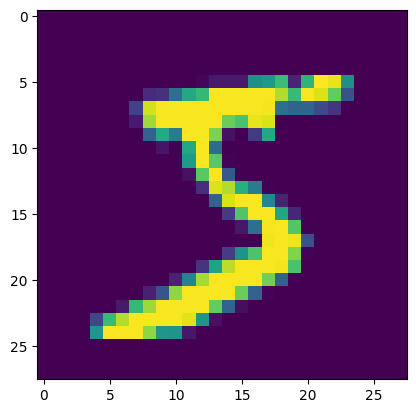

In [ ]:
plt.imshow(example.reshape((28,28)))

In [ ]:
train_size = int(len(dataset)*0.8)
test_size =len(dataset)-train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_size, test_size))
print("{} examples for training and {} for testing".format( len(train_dataset), len(test_dataset)))



56000 examples for training and 14000 for testing


In [ ]:
import torch.nn as nn

In [ ]:
class LastTimeStep(nn.Module):

  def __init__(self, rnn_layers=1, bidirectional=False):
    super(LastTimeStep,self).__init__()
    self.rnn_layers = rnn_layers
    if bidirectional:
      self.num_directions=2
    else:
      self.num_directions=1

  def forward(self,input):

    rnn_output = input[0]
    last_step = input[1]




In [ ]:
!pip install tqdm

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import *
from tqdm import *

In [ ]:
def train_simple_network(model, loss_func, training_loader, epochs , device="cpu"):

  optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
  model.to(device)

  for epoch in tqdm(range(epochs), desc="Epochs"):
    model = model.train()
    total_loss = 0.0
    for inputs, labels in tqdm(training_loader,desc="Batch"):
      inputs = inputs.to(device)
      labels = labels.to(device)
      optimizer.zero_grad()
      y_hat = model(inputs)
      loss = loss_func(y_hat,labels)
      loss.backward()
      optimizer.step()
      total_loss += loss.item()

In [ ]:
import seaborn as sns

<Axes: >

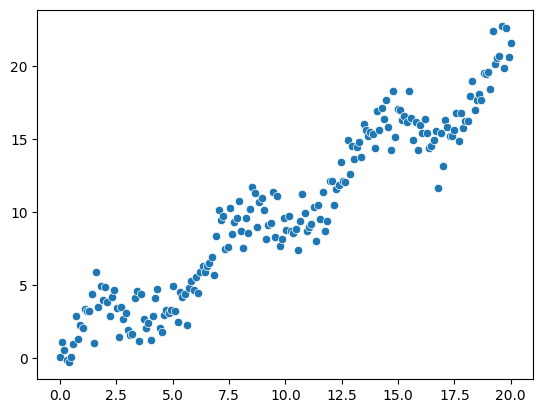

In [ ]:
X = np.linspace(0, 20, num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)
sns.scatterplot(x=X, y=y)

In [ ]:
class SimplelinearDataset(Dataset):

  def __init__(self,X,y):
    super(SimplelinearDataset,self).__init__()
    self.X = X
    self.y = y

  def __getitem__(self, index):

    return torch.tensor(self.X[index], dtype= torch.float32),torch.tensor(self.y[index], dtype= torch.float32)

  def __len__(self):
    return X.shape[0]

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
training_loader = DataLoader(SimplelinearDataset(X,y), shuffle=True)

In [ ]:
in_features = 1
out_features = 1
model = nn.Linear(in_features, out_features)
loss_func = nn.MSELoss()
device = torch.device("cuda")
train_simple_network(model, loss_func, training_loader,epochs=50, device=device)

Epochs: 100%|██████████| 50/50 [00:12<00:00,  4.16it/s]


<Axes: >

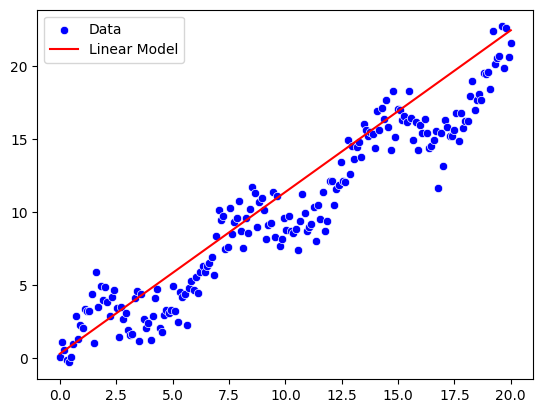

In [ ]:
with torch.no_grad():
        Y_pred = model(torch.tensor(X.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()

sns.scatterplot(x=X, y=y, color='blue', label='Data')
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Linear Model')

<Axes: >

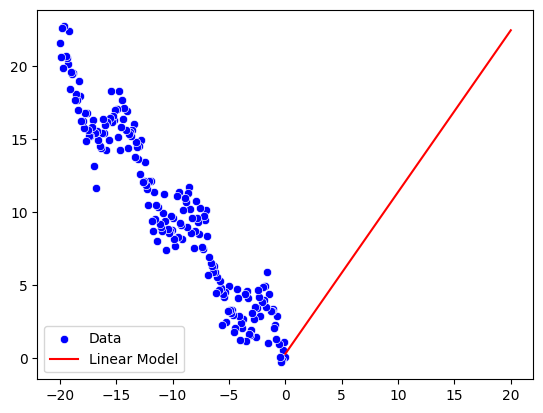

In [ ]:
with torch.no_grad():
        Y_pred = model(torch.tensor(X.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()

sns.scatterplot(x=-X, y=y, color='blue', label='Data')
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Linear Model')

<Axes: >

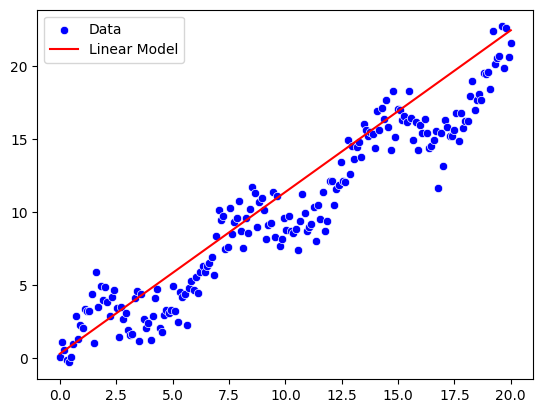

In [ ]:
with torch.no_grad():
        Y_pred = model(torch.tensor(X.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()

sns.scatterplot(x=X, y=y, color='blue', label='Data')
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Linear Model')

In [ ]:
model = nn.Sequential(
    nn.Linear(1, 10),
    nn.Linear(10, 1),
)

train_simple_network(model, loss_func, training_loader,epochs=50, device=device)

Epochs: 100%|██████████| 50/50 [00:16<00:00,  3.03it/s]


<Axes: >

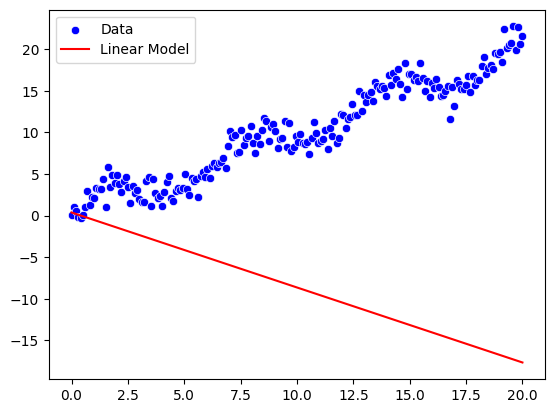

In [ ]:
with torch.no_grad():
        Y_pred = model(torch.tensor(-X.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()

sns.scatterplot(x=X, y=y, color='blue', label='Data')
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Linear Model')

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(1, 10),
    nn.Tanh(),
    nn.Linear(10, 1),
)

train_simple_network(model_2, loss_func, training_loader,epochs=50, device=device)

Epochs: 100%|██████████| 50/50 [00:23<00:00,  2.16it/s]


<Axes: >

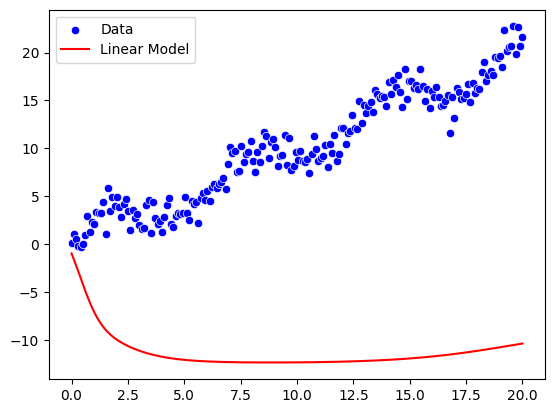

In [ ]:
with torch.no_grad():
        Y_pred = model_2(torch.tensor(-X.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()

sns.scatterplot(x=X, y=y, color='blue', label='Data')
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Linear Model')

In [ ]:
import torchvision
from torchvision import transforms

In [ ]:
mnist_data_train = torchvision.datasets.MNIST("./data", train=True, download=True)
mnist_data_test = torchvision.datasets.MNIST("./data", train=False, download=True)
x_example, y_example = mnist_data_train[0]


In [ ]:
print(type(x_example))

<class 'PIL.Image.Image'>


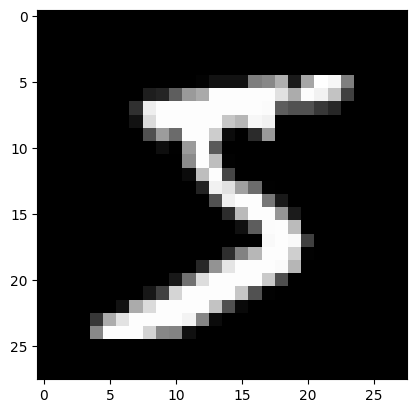

In [ ]:
plt.imshow(mnist_data_train[0][0], cmap='gray')


In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

B = 32
mnist_train_loader = DataLoader(mnist_data_train, batch_size=B, shuffle=True)
mnist_test_loader = DataLoader(mnist_data_test, batch_size=B)

In [ ]:
D = 28*28

C = 1

classes = 10

filters = 16

K = 3

model_linear = nn.Sequential(
  nn.Flatten(), # (B, C, W, H) -> (B, C*W*H) = (B,D)
  nn.Linear(D, 256),
  nn.Tanh(),
  nn.Linear(256, classes),
)

model_cnn = nn.Sequential(
  nn.Conv2d(C, filters, K, padding=K//2),
  nn.Tanh(),
  nn.Flatten(),
  nn.Linear(filters*D, classes),
)

In [ ]:
loss_func = nn.CrossEntropyLoss()
cnn_results = train_simple_network(model_cnn, loss_func, mnist_train_loader, test_loader=mnist_test_loader,
score_funcs={'Accuracy': accuracy_score}, device=device, epochs=20)
fc_results = train_simple_network(model_linear, loss_func, mnist_train_loader, test_loader=mnist_test_loader, score_funcs={'Accuracy': accuracy_score}, device=device, epochs=20)


NameError: ignored

In [ ]:
with torch.no_grad():
  input = torch.tensor([1,2,3,1,2,0], dtype=torch.long)
  embd = nn.Embedding(input.size()[0],10)
  out = embd(input)
  print(out)
  print(out.size())


tensor([[-0.0898, -1.1422,  0.7451,  0.3468, -0.1014,  0.0241, -0.8797, -1.5615,
          0.2211,  1.1590],
        [ 0.0245,  0.3385,  0.2733,  0.7836, -0.0549, -1.7357, -0.6940, -1.0706,
          0.1162, -0.2725],
        [-0.3149,  1.2916,  0.4547, -0.6516, -0.2378,  0.1614, -0.1926, -0.3841,
          0.0166,  1.4048],
        [-0.0898, -1.1422,  0.7451,  0.3468, -0.1014,  0.0241, -0.8797, -1.5615,
          0.2211,  1.1590],
        [ 0.0245,  0.3385,  0.2733,  0.7836, -0.0549, -1.7357, -0.6940, -1.0706,
          0.1162, -0.2725],
        [-0.8089, -1.0617,  0.5528, -0.9862,  2.9382,  0.4771,  1.5101,  0.1728,
         -0.2273,  0.5634]])
torch.Size([6, 10])


In [ ]:
out[0],out[3]

(tensor([-0.0898, -1.1422,  0.7451,  0.3468, -0.1014,  0.0241, -0.8797, -1.5615,
          0.2211,  1.1590]),
 tensor([-0.0898, -1.1422,  0.7451,  0.3468, -0.1014,  0.0241, -0.8797, -1.5615,
          0.2211,  1.1590]))

In [ ]:
class LastTimeStep(nn.Module):

  def __init__(self,rnn_layers=1, bidirectional=False):

    super(LastTimeStep,self).__init__()
    self.rnn_layers = rnn_layers
    if bidirectional:
      self.num_directions = 2
    else:
      self.num_directions = 1


  def forward(self, input):

    rnn_output = input[0]
    last_step = input[1]

    if type(last_step)==tuple:
      last_step = last_step[0]

    batch_size = last_step.shape[1]

    last_step = last_step.view(self.rnn_layers,self.num_directions,batch_size,-1)
    last_step = last_step[self.rnn_layers-1]
    last_step = last_step.permute(1,0,2)
    last_step = last_step.reshape(batch_size,-1)

    return last_step


In [ ]:
D = 64
classes = 2
hidden_nodes = 64
vocab_size =512

In [ ]:
first_rnn = nn.Sequential(
    nn.Embedding(vocab_size, D),
    #nn.RNN(input_size=,hidden_size=,num_layers=,batch_first=True,bidirectional)
    nn.RNN(input_size=D,hidden_size=hidden_nodes,batch_first=True),
    LastTimeStep(),
    nn.Linear(hidden_nodes,classes)
)

In [ ]:
# we can start increasing layers of RNN by increasing nn.RNN(num_layers = 3), and LASttimestep rnn_layers = 3

In [ ]:
# for bidirectional we need to
# nn.RNN(bidirectional=True)
# LastTimeStep(bidirectional=True)
# nn.Linear(2*hidden_nodes)

In [ ]:
train_data = torchvision.datasets.FashionMNIST("./", train=True,  transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.FashionMNIST("./", train=True, transform=transforms.ToTensor(), download=True)

W, H = 28, 28
D = 28*28
n = 256
C = 1

n_filters = 32


classes = 10
train_loader  = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128)

In [ ]:
fc_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(D, n), nn.Tanh(),
    *[nn.Sequential(nn.Linear(n, n),nn.Tanh()) for _ in range(5)],
    nn.Linear(n, classes),
)

In [ ]:
cnn_model = nn.Sequential(
    nn.Conv2d(C, n_filters, 3, padding=1),             nn.Tanh(),
    nn.Conv2d(n_filters, n_filters, 3, padding=1),     nn.Tanh(),
    nn.Conv2d(n_filters, n_filters, 3, padding=1),     nn.Tanh(),
    nn.MaxPool2d((2,2)),
    nn.Conv2d( n_filters, 2*n_filters, 3, padding=1),  nn.Tanh(),
    nn.Conv2d(2*n_filters, 2*n_filters, 3, padding=1), nn.Tanh(),
    nn.Conv2d(2*n_filters, 2*n_filters, 3, padding=1), nn.Tanh(),
    nn.MaxPool2d((2,2)),
    nn.Conv2d(2*n_filters, 4*n_filters, 3, padding=1), nn.Tanh(),
    nn.Conv2d(4*n_filters, 4*n_filters, 3, padding=1), nn.Tanh(),
    nn.Flatten(),
    nn.Linear(D*n_filters//4, classes),
)

In [ ]:
loss_func = nn.CrossEntropyLoss()
fc_results = train_simple_network(fc_model, loss_func, train_loader, epochs=10)

Epochs: 100%|██████████| 10/10 [01:47<00:00, 10.75s/it]


In [ ]:
fc_results = train_simple_network(cnn_model, loss_func, train_loader, epochs=10)

Epochs: 100%|██████████| 10/10 [36:59<00:00, 221.99s/it]


In [ ]:
del fc_model
del cnn_model

In [ ]:
leak_rate = 0.01

In [ ]:
fc_relu_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(D, n), nn.LeakyReLU(leak_rate),
    *[nn.Sequential(nn.Linear(n, n), nn.LeakyReLU(leak_rate)) for _ in range(5)],
    nn.Linear(n, classes),
)

In [ ]:
def cnnLayer(in_filters, out_filters=None, kernel_size=3):
    """
    in_filters: how many channels are coming into the layer
    out_filters: how many channels this layer should learn / output, or ‘None‘
    if we want to have the same number of channels as the input.
    kernel_size: how large the kernel should be
    """
    if out_filters is None:
    out_filters = in_filters
    padding=kernel_size//2
    return nn.Sequential(

    nn.Conv2d(in_filters, out_filters, kernel_size, padding=padding),
    nn.LeakyReLU(leak_rate)
)


IndentationError: ignored

In [ ]:
cnn_relu_model = nn.Sequential(
    cnnLayer(C, n_filters), cnnLayer(n_filters), cnnLayer(n_filters),
    nn.MaxPool2d((2,2)),
    cnnLayer(n_filters, 2*n_filters),
    cnnLayer(2*n_filters),
    cnnLayer(2*n_filters),
    nn.MaxPool2d((2,2)),
    cnnLayer(2*n_filters, 4*n_filters), cnnLayer(4*n_filters),
    nn.Flatten(),
    nn.Linear(D*n_filters//4, classes),
)

In [ ]:
fc_results = train_simple_network(fc_relu_model, loss_func, train_loader, epochs=10)

In [ ]:
fc_results = train_simple_network(cnn_relu_model, loss_func, train_loader, epochs=10)

In [ ]:
fc_bn_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(D, n), nn.BatchNorm1d(n), nn.LeakyReLU(leak_rate),
    *[nn.Sequential(nn.Linear(n, n), nn.BatchNorm1d(n), nn.LeakyReLU(leak_rate))
    for _ in range(5)],
    nn.Linear(n, classes),
)

In [ ]:
def cnnLayer(in_filters, out_filters=None, kernel_size=3):

    if out_filters is None:
        out_filters = in_filters

    padding=kernel_size//2

    return nn.Sequential(

        nn.Conv2d(in_filters, out_filters, kernel_size, padding=padding),

        nn.BatchNorm2d(out_filters),
        nn.LeakyReLU(leak_rate)
)

In [ ]:
fc_results = train_simple_network(fc_bn_model, loss_func, train_loader, epochs=10)

In [ ]:
class SkipFC(nn.Module):
    def __init__(self, n_layers, in_size, out_size, leak_rate=0.1):
        """
        n_layers: how many hidden layers for this block of dense skip connections
        in_size: how many features are coming into this layer
        out_size: how many features should be used for the final layer of this block.
        leak_rate: the parameter for the LeakyReLU activation function.
        """

    super().__init__()
        l = n_layers-1                                         ❶
        self.layers = nn.ModuleList([
         nn.Linear(in_size*l, out_size) if i == l            ❷
        ➥ else nn.Linear(in_size, in_size)
        ➥ for i in range(n_layers)])
        self.bns = nn.ModuleList([
        ➥ nn.BatchNorm1d(out_size) if i == l                  ❷
        ➥ else nn.BatchNorm1d(in_size)
        ➥ for i in range(n_layers)])
    self.activation = nn.LeakyReLU(leak_rate)                  ❸

    def forward(self, x): activations = []                     ❹
        for layer, bn in zip(self.layers[:-1], self.bns[:-1]): ❺
            x = self.activation(bn(layer(x)))
            activations.append( x )
        x = torch.cat(activations, dim=1)                      ❻

        return self.activation(self.bns[-1](
        ➥ self.layers[-1](x)))

In [ ]:
class ResidualBlockE(nn.Module):
    def __init__(self, channels, kernel_size=3, leak_rate=0.1):
        """
        channels: how many channels are in the input/output to this layer
        kernel_size: how large of a filter should we use
        leak_rate: parameter for the LeakyReLU activation function
        """
        super().__init__()
        pad = (kernel_size-1)//2 ❶
        self.F = nn.Sequential(  ❷
            nn.Conv2d(channels, channels, kernel_size, padding=pad),
            nn.BatchNorm2d(channels),
            nn.LeakyReLU(leak_rate),
            nn.Conv2d(channels, channels, kernel_size, padding=pad),
            nn.BatchNorm2d(channels),
            nn.LeakyReLU(leak_rate),
        )
    def forward(self, x):
        return x + self.F(x)

In [ ]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import re

all_data = []
resp = urlopen("https://cs.stanford.edu/people/karpathy/char-rnn/shakespear.txt")
shakespear_100k = resp.read()
print(shakespear_100k[:50])
shakespear_100k = shakespear_100k.decode('utf-8').lower()
print(shakespear_100k[:50])


b"That, poor contempt, or claim'd thou slept so fait"
that, poor contempt, or claim'd thou slept so fait


In [ ]:
vocab2index = {}

for char in shakespear_100k:
  if char not in vocab2index:
    vocab2index[char]= len(vocab2index)

In [ ]:
vocab2index

In [ ]:
index2vocab = {}

for k,v in vocab2index.items():
  index2vocab[v] = k

In [ ]:
print(len(vocab2index))

36


In [ ]:
print("Total Characters:", len(shakespear_100k))

Total Characters: 99993


In [ ]:
!pip install portalocker>=2.0.0

In [ ]:
!pip uninstall torchtext


In [ ]:
!pip install torchtext==0.6.0
!pip install sentencepiece

In [ ]:
import torchtext
from torchtext.datasets import AG_NEWS

train_iter, test_iter = AG_NEWS(root='./data')
train_dataset = list(train_iter)
test_dataset = list(test_iter)

ag_news_csv.tar.gz: 100%|██████████| 11.8M/11.8M [00:00<00:00, 56.7MB/s]
120000lines [00:06, 18772.13lines/s]
120000lines [00:09, 12731.04lines/s]
7600lines [00:00, 8179.83lines/s]


In [ ]:
train_dataset[0]

(2,
 tensor([  432,   426,     2,  1606, 14839,   114,    67,     3,   849,    14,
            28,    15,    28,    16, 50726,     4,   432,   375,    17,    10,
         67508,     7, 52259,     4,    43,  4010,   784,   326,     2]))

In [ ]:
test_dataset[0]

(2,
 tensor([  870,    12,    84,   138,  1482,    35,   174,  1753,  4059,   401,
            21,  6558, 38435,   234,    68,    43,    17,  4478,    17,    35,
           174,    19, 11302,  2448,   321,   195,  9840,     2]))

In [ ]:
print(train_dataset[0])


(2, tensor([  432,   426,     2,  1606, 14839,   114,    67,     3,   849,    14,
           28,    15,    28,    16, 50726,     4,   432,   375,    17,    10,
        67508,     7, 52259,     4,    43,  4010,   784,   326,     2]))


In [ ]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer('basic_english')

from collections import Counter
from torchtext.vocab import Vocab
import numpy as np

counter = Counter()
for (label, line) in train_dataset:
     line = str(np.array(line))
     counter.update(tokenizer((line)))
vocab = Vocab(counter, min_freq=10,specials=('<unk>', '<SOS>', '<EOS>', '<PAD>'))

In [ ]:
def text_transform(x):
  return [vocab['<SOS>']] + [vocab[token] for token in tokenizer(str(np.array(x)))] + [vocab['<EOS>']]

def label_transform(x):
    return x-1

print(text_transform(train_dataset[0][1]))

[1, 11, 436, 429, 6, 1627, 14637, 118, 71, 4, 851, 18, 32, 19, 32, 20, 0, 5, 436, 379, 21, 14, 0, 10, 0, 5, 47, 4016, 784, 330, 9, 2]


In [ ]:
VOCAB_SIZE = len(vocab)
NUM_CLASS = len(np.unique([z[0] for z in train_dataset]))
print("Vocab: ", VOCAB_SIZE)
print("Num Classes: ", NUM_CLASS)

padding_idx = vocab["<PAD>"]

embed_dim = 128
B = 64
epochs = 15


Vocab:  20383
Num Classes:  4


In [ ]:
def pad_batch(batch):
  """
  Pad items in the batch to the length of the longest item in the batch.
  Also, re-order so that the values are returned (input, label)
  """

  labels = [label_transform(z[0]) for z in batch]
  texts = [torch.tensor(text_transform(z[1]),dtype=torch.int64) for z in batch]
  max_len = max([text.size(0) for text in texts])

  texts = [F.pad(text, (0,max_len-text.size(0)),value=padding_idx) for text in texts]

  x, y = torch.stack(texts), torch.tensor(labels, dtype=torch.int64)
  return x, y

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=B, shuffle=True, collate_fn=pad_batch)
test_loader = DataLoader(test_dataset, batch_size=B, collate_fn=pad_batch)

In [ ]:
import torch.nn as nn

In [ ]:
gru = nn.Sequential(
    nn.Embedding(VOCAB_SIZE, embed_dim,padding_idx=padding_idx),

    nn.GRU(embed_dim, embed_dim, num_layers=3, batch_first=True, bidirectional=True),

    LastTimeStep(rnn_layers=3, bidirectional=True),
    nn.Linear(embed_dim*2, NUM_CLASS),
)

loss_func = nn.CrossEntropyLoss()
gru_results = train_network(gru, loss_func, train_loader, val_loader=test_loader, score_funcs={'Accuracy': accuracy_score},  device=device, epochs=epochs)

NameError: name 'LastTimeStep' is not defined

In [ ]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import re

all_data = []
resp = urlopen("https://download.pytorch.org/tutorial/data.zip")
zipfile = ZipFile(BytesIO(resp.read()))

for line in zipfile.open("data/eng-fra.txt").readlines():
    line = line.decode('utf-8').lower()
    line = re.sub(r"[-.!?]+", r" ", line)
    source_lang, target_lang = line.split("\t")[0:2]
    all_data.append( (source_lang.strip(), target_lang.strip()) )


In [ ]:
all_data[0],all_data[1]

(('go', 'va'), ('run', 'cours'))

In [ ]:
source_lang[0],target_lang[0]

('i', 'i')

In [ ]:
for i in range(10):
    print(all_data[i])

('go', 'va')
('run', 'cours')
('run', 'courez')
('wow', 'ça alors')
('fire', 'au feu')
('help', "à l'aide")
('jump', 'saute')
('stop', 'ça suffit')
('stop', 'stop')
('stop', 'arrête toi')


In [ ]:
short_subset = []
MAX_LEN = 6
for (s, t) in all_data:
    if max(len(s.split(" ")), len(t.split(" "))) <= MAX_LEN:
        short_subset.append((s,t))
print("Using ", len(short_subset), "/", len(all_data))

Using  66251 / 135842


In [ ]:
SOS_token = "<SOS>"
EOS_token = "<EOS>"
PAD_token = "_PADDING_"

word2indx = {PAD_token:0, SOS_token:1, EOS_token:2}
for s, t in short_subset:
  for sentence in (s, t):
    for word in sentence.split(" "):
      if word not in word2indx:
        word2indx[word] = len(word2indx)
print("Size of Vocab: ", len(word2indx))
indx2word = {}
for word, indx in word2indx.items():
  indx2word[indx] = word


Size of Vocab:  24577
